### The paths don't work because everything was moved but the code is correct

In [1]:
from lightkurve import search_targetpixelfile, search

import matplotlib.pyplot as plt
%matplotlib inline

from altaipony.flarelc import FlareLightCurve

import os

import numpy as np

CWD = "/".join(os.getcwd().split("/")[:-2])

import warnings
warnings.simplefilter("ignore")

/usr/lib64/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# Create a light curve mosaic from individual pixel light curves

In [2]:
TIC = 230120143
c = 16

In [3]:
# if you need to create the tiles first, you have to do it manually
tpfl = search_targetpixelfile(f"TIC {TIC}", sector=c, cadence="short")
tpf = tpfl.download_all()

Loading KWallet
Loading SecretService
Loading Windows
Loading chainer
Loading macOS
Loading KWallet
Loading SecretService
Loading Windows
Loading chainer
Loading macOS


FileNotFoundError: [Errno 2] No such file or directory: '/home/eilin/.lightkurve-cache/mastDownload/TESS/tess2019253231442-s0016-0000000230120143-0152-s/tess2019253231442-s0016-0000000230120143-0152-s_tp.fits'

In [4]:
tpf[0][12000:16000,].interact(notebook_url='http://0.0.0.0:8080')

0% (0/4000) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
0% (0/4000) of the cadences will be ignored due to the quality mask (quality_bitmask=175).


Starting Bokeh server version 1.3.4 (running on Tornado 6.0.3)


In [5]:
paths = ! ls /work1/eilin/MultiperiodFlares/MalachiteMountains/data/lcs/single_pixel_lcs/*449*
len(paths)

25

0% (0/4000) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
0% (0/4000) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
/work1/eilin/Flares_in_Clusters_2/RESULTS_Github/flares-in-clusters-with-k2-ii/flaresinclustersii/lib64/python3.6/site-packages/ipykernel_launcher.py:8: ResourceWarning: unclosed file <_io.FileIO name='/work1/eilin/MultiperiodFlares/MalachiteMountains/data/lcs/single_pixel_lcs/00_TESS_44984200_custom-lc.fits' mode='rb' closefd=True>
  
0% (0/4000) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
0% (0/4000) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
/work1/eilin/Flares_in_Clusters_2/RESULTS_Github/flares-in-clusters-with-k2-ii/flaresinclustersii/lib64/python3.6/site-packages/ipykernel_launcher.py:8: ResourceWarning: unclosed file <_io.FileIO name='/work1/eilin/MultiperiodFlares/MalachiteMountains/data/lcs/single_pixel_lcs/01_TESS_44984200_cus

0% (0/4000) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
0% (0/4000) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
/work1/eilin/Flares_in_Clusters_2/RESULTS_Github/flares-in-clusters-with-k2-ii/flaresinclustersii/lib64/python3.6/site-packages/ipykernel_launcher.py:8: ResourceWarning: unclosed file <_io.FileIO name='/work1/eilin/MultiperiodFlares/MalachiteMountains/data/lcs/single_pixel_lcs/31_TESS_44984200_custom-lc.fits' mode='rb' closefd=True>
  
0% (0/4000) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
0% (0/4000) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
/work1/eilin/Flares_in_Clusters_2/RESULTS_Github/flares-in-clusters-with-k2-ii/flaresinclustersii/lib64/python3.6/site-packages/ipykernel_launcher.py:8: ResourceWarning: unclosed file <_io.FileIO name='/work1/eilin/MultiperiodFlares/MalachiteMountains/data/lcs/single_pixel_lcs/32_TESS_44984200_cus

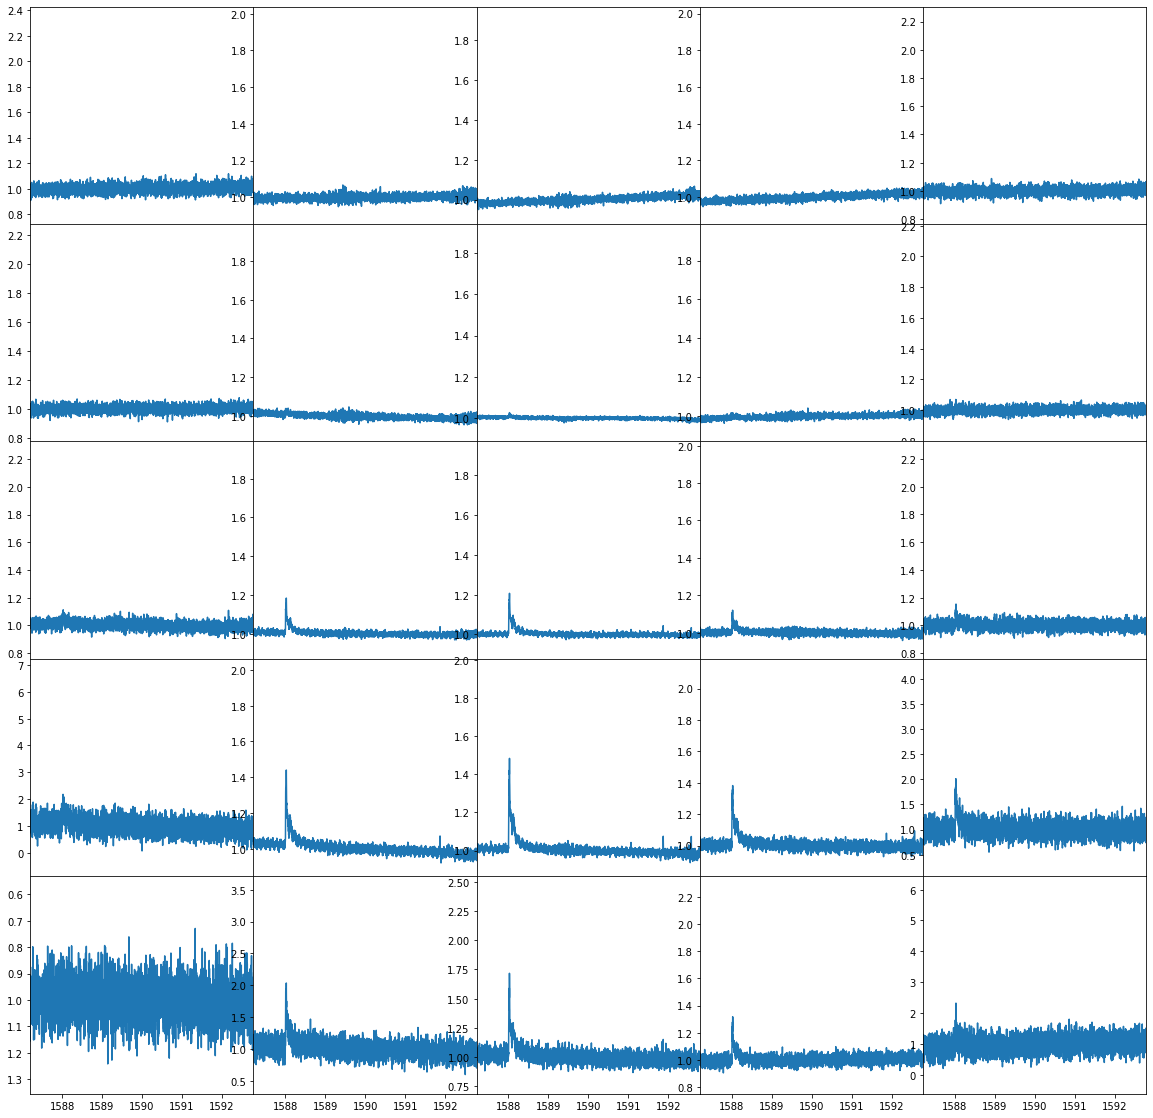

200 GET /autoload.js?bokeh-autoload-element=1001&bokeh-absolute-url=http://0.0.0.0:33381&resources=none (127.0.0.1) 600.83ms
101 GET /ws?bokeh-protocol-version=1.0&bokeh-session-id=kE0u9xywyGAM9VNxa4CAO7Sld9gTOC5AOqvXzkxR49E9 (127.0.0.1) 1.75ms
WebSocket connection opened
ServerConnection created


In [6]:
fig, ax = plt.subplots(nrows=5,ncols=5, figsize=(20,20), sharex=True)

for p in paths:
    j, i = p.split("/")[-1].split("_")[0]
    i, j = int(i), int(j)
    #i = 4-int(p[0])+1
    #j = int(p[1])
    flc = search.open(p).get_lightcurve("FLUX")
    flc = FlareLightCurve(time=flc.time, flux=flc.flux, 
                      flux_err=flc.flux_err, cadenceno=flc.cadenceno, targetid=flc.targetid)

    #flcd = custom_detrending(flc)
    #ax[i][j].plot(flcd.time,flcd.detrended_flux/np.nanmedian(flcd.detrended_flux))
    ax[i][j].plot(flc.time,flc.flux/np.nanmedian(flc.flux))
    ax[i][j].set_xlim(flc.time[0],flc.time[-1])
    #rel = np.nanmean(flcd.detrended_flux_err / flcd.detrended_flux)
    rel = np.nanmean(flc.flux_err / flc.flux)
    ax[i][j].set_ylim(.9-3*rel,1.9 + 9*rel)
    
plt.subplots_adjust(hspace=0.,wspace=0)
#plt.savefig(f"/work1/eilin/MultiperiodFlares/MalachiteMountains/analysis/plots/{TIC}_pixelwise_lcs.png",dpi=300)